# Backtesting of strategy based on Stochastic Dominace Contstarints benchmark against equally weighted portfolio

In [7]:
import datetime
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
from src.algorithms.strategy import  EqualyWeighted, StochasticDominanceOpt
from src.datasource.yahoodata import YahooDataSource
from src.backtest.backtest import BackTest

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK']
column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2020,5,1)
end_date = datetime.datetime(2025,5,1)

In [8]:
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
all_data = main_data.get_data_by_frequency(start_date,end_date,'1d')
ffill_data = main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()

Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK


In [9]:
equalyWeighted = EqualyWeighted()
StochasticDomin = StochasticDominanceOpt(equalyWeighted)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              1.126929
Mean Daily Return         0.000537
Mean Yearly Retrun        0.144956
Mean Daily SP500 Return   0.000413
Mean Yearly SP500 Return  0.109572
Std Dev of Daily Return   0.010786
Sharpe Ratio              0.790795
Downside Std Daily        0.009034
Sortino Ratio             0.944162
Calmar Ratio              4.394828
Max Drawdown              0.256422
Alpha                     0.000212
Beta                      1.108334


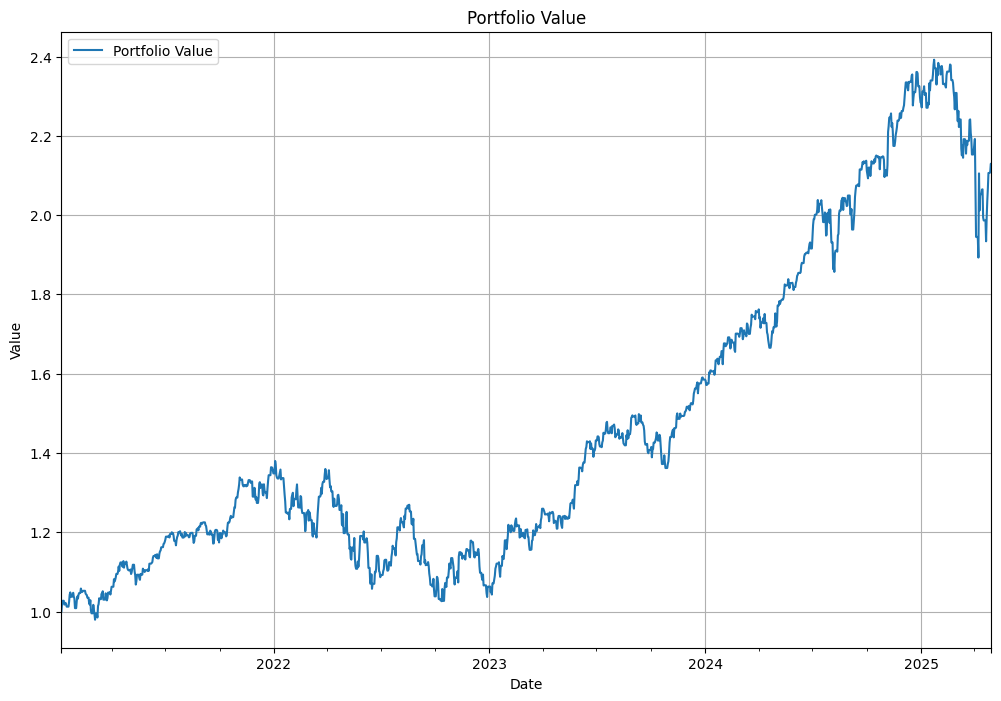

In [10]:

equalyWeighted_bt = BackTest(main_data, equalyWeighted)
equalyWeighted_bt.backtest(start_date, end_date, 250, 15, '1d')
equalyWeighted_bt.plot_portfolio_returns()
equally_summary = equalyWeighted_bt.get_summary()
print(equally_summary)


Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              1.678978
Mean Daily Return         0.000683
Mean Yearly Retrun        0.187713
Mean Daily SP500 Return   0.000413
Mean Yearly SP500 Return  0.109572
Std Dev of Daily Return   0.010712
Sharpe Ratio              1.012021
Downside Std Daily        0.008400
Sortino Ratio             1.290525
Calmar Ratio              7.087372
Max Drawdown              0.236897
Alpha                     0.000430
Beta                      0.859414


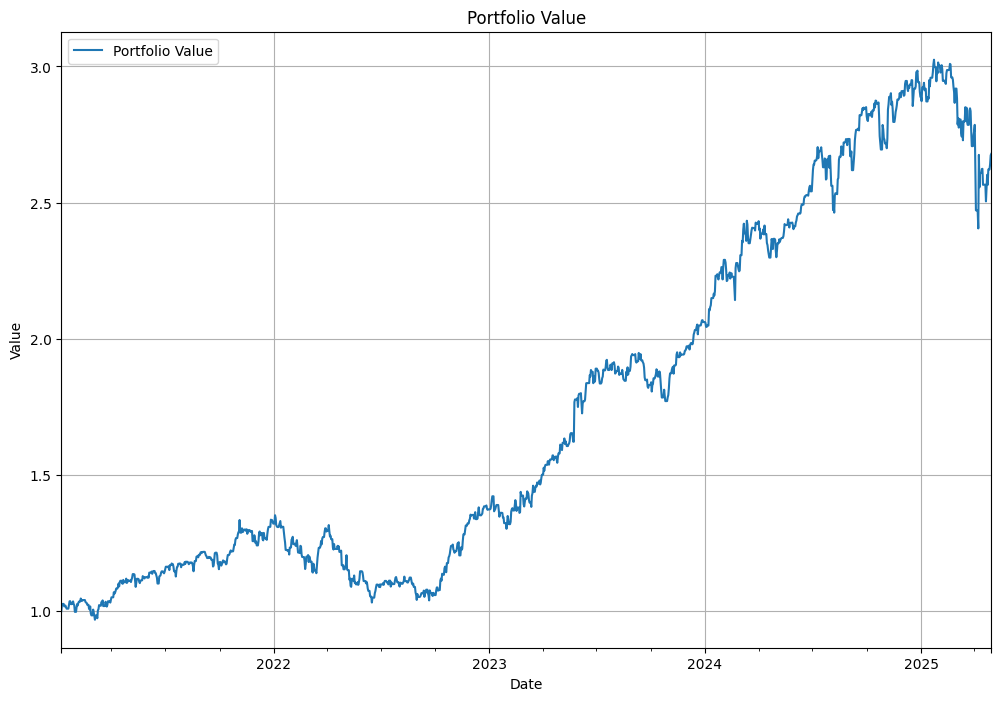

In [11]:
st_dominance = BackTest(main_data, StochasticDomin)
st_dominance.backtest(start_date, end_date, 250, 15, '1d')
st_dominance.plot_portfolio_returns()
st_dominance_summary = st_dominance.get_summary()
print(st_dominance_summary)

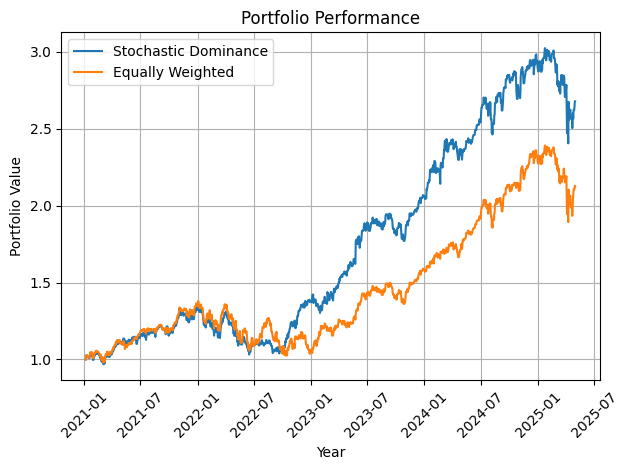

In [14]:
plt.plot(st_dominance.portfolio_value,label='Stochastic Dominance')
plt.plot(equalyWeighted_bt.portfolio_value,label='Equally Weighted')
plt.title('Portfolio Performance')
plt.ylabel('Portfolio Value')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
# Stack all summaries dataframes
all_summaries = [equally_summary, st_dominance_summary]
all_summaries_df = pd.concat(all_summaries, axis=1)

all_summaries_df.columns = ['Equally Weighted','Stochastic Dominance Equally Weighted ']

all_summaries_df

,Equally Weighted,Stochastic Dominance Equally Weighted
Metric,,
Total Return,1.126929,1.678978
Mean Daily Return,0.000537,0.000683
Mean Yearly Retrun,0.144956,0.187713
Mean Daily SP500 Return,0.000413,0.000413
Mean Yearly SP500 Return,0.109572,0.109572
Std Dev of Daily Return,0.010786,0.010712
Sharpe Ratio,0.790795,1.012021
Downside Std Daily,0.009034,0.008400
Sortino Ratio,0.944162,1.290525
